# Dataset de Acidentes de Carro na Austrália

## Importando módulos e criando a chamada do dataset.

In [71]:
import kagglehub

# Pega a última versão do dataset
path = kagglehub.dataset_download("deepcontractor/australian-fatal-car-accident-data-19892021")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\vinic\.cache\kagglehub\datasets\deepcontractor\australian-fatal-car-accident-data-19892021\versions\2


In [72]:
import pandas as pd # -> Manipulação dos dados
import numpy as np # -> Aritmética
import matplotlib.pyplot as plt # -> Visualização
import seaborn as sns # -> Visualização

In [73]:
df = pd.read_csv(path + "/Crash_Data.csv", low_memory=False) # -> Lê o arquivo CSV

## Leitura de cabeçalhos e rápidas descrições/interpretações do dataset.

In [74]:
df.head() # -> Um cabealho do dataframe

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [75]:
df.info() # -> Informações do dataframe, como tipos de dados e valores nulos. Verificamos que esse dataset já não traz nenhum nulo, mas isso não está completamente certo, veremos mais para frente isso.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

In [76]:
df.describe() # -> Estatísticas descritivas do dataframe, a olho nu assim, não conseguimos tirar muita informação relevante

,Crash ID,Month,Year,Age
count,5.284300e+04,52843.000000,52843.000000,52843.000000
mean,2.003021e+07,6.568685,2002.729974,39.662377
std,9.383542e+04,3.457347,9.378570,21.806198
min,1.989100e+07,1.000000,1989.000000,-9.000000
25%,1.995111e+07,4.000000,1995.000000,22.000000
50%,2.002144e+07,7.000000,2002.000000,34.000000
75%,2.010408e+07,10.000000,2010.000000,55.000000
max,2.021801e+07,12.000000,2021.000000,101.000000


## Dropar colunas que não são relevantes para o modelo.

In [77]:
df.drop(columns=[
    'Crash ID', 'Month', 'Year', 'Dayweek', 'Time', 'Age',
    'SA4 Name 2016', 'National LGA Name 2017', 'National Road Type',
], inplace=True)

df.head() # -> Verificamos se as colunas foram realmente removidas

,State,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,National Remoteness Areas,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,Vic,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,Inner Regional Australia,No,No,26_to_39,Weekend,Night
1,SA,Multiple,No,No,No,110,Pedestrian,Female,Major Cities of Australia,No,No,26_to_39,Weekend,Night
2,Vic,Single,NaN,NaN,NaN,NaN,Passenger,Male,Inner Regional Australia,No,No,17_to_25,Weekend,Night
3,Vic,Single,NaN,NaN,NaN,NaN,Driver,Male,Outer Regional Australia,No,No,17_to_25,Weekend,Night
4,Vic,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,Major Cities of Australia,No,No,40_to_64,Weekend,Night


### Separando as variáveis preditoras e a variável target.

In [78]:
X = df.drop(columns=['Crash Type'])
y = df['Crash Type']
df_model = df.dropna(subset=X.columns.tolist() + ['Crash Type']) # Caso tenha algum nulo, removemos a linha inteira

df_model.head()

,State,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,National Remoteness Areas,Christmas Period,Easter Period,Age Group,Day of week,Time of day
1,SA,Multiple,No,No,No,110,Pedestrian,Female,Major Cities of Australia,No,No,26_to_39,Weekend,Night
5,Qld,Multiple,No,No,No,100,Motorcycle rider,Male,Major Cities of Australia,No,No,17_to_25,Weekend,Night
9,Qld,Single,No,No,No,60,Driver,Male,Major Cities of Australia,No,No,40_to_64,Weekend,Night
10,SA,Single,No,No,No,80,Driver,Male,Inner Regional Australia,No,No,17_to_25,Weekday,Night
11,Qld,Multiple,No,No,No,50,Motorcycle rider,Male,Major Cities of Australia,No,No,40_to_64,Weekend,Night


### Se tinha algum valor nulo, agora já resolveu. Atualizamos o X e o y abaixo com o novo dataset sem nulos.

In [79]:
# Atualiza X e y com dados sem nulos
X = df_model.drop(columns=['Crash Type'])
y = df_model['Crash Type']


### Codificação das variáveis categóricas

In [80]:
# Seleciona as colunas categóricas, ou seja, aquelas que são do tipo object (string)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['State',
 'Bus Involvement',
 'Heavy Rigid Truck Involvement',
 'Articulated Truck Involvement',
 'Speed Limit',
 'Road User',
 'Gender',
 'National Remoteness Areas',
 'Christmas Period',
 'Easter Period',
 'Age Group',
 'Day of week',
 'Time of day']

In [81]:
from sklearn.compose import ColumnTransformer # -> Para transformar as colunas
from sklearn.preprocessing import OneHotEncoder # -> Para codificar as variáveis categóricas
# Cria o OneHotEncoder para codificar as variáveis categóricas

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) # -> Codifica as variáveis categóricas
    ],
    remainder='passthrough' # -> Mantém as colunas que não são categóricas
)

## Divisão dos dados em treino e teste

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42) # -> Divide os dados em treino e teste, 80% para treino e 20% para teste

## Modelos

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    'SVM': SVC()
}

### Treinamento dos modelos e avaliação

In [85]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

for name, model in models.items():
    print(f"        \n==== Treinando {name} ====")
    pipeline = Pipeline(steps =[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train) # -> Treina o modelo
    y_pred = pipeline.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

        
==== Treinando Random Forest ====
[[1519  845]
 [ 844 2226]]
              precision    recall  f1-score   support

    Multiple       0.64      0.64      0.64      2364
      Single       0.72      0.73      0.72      3070

    accuracy                           0.69      5434
   macro avg       0.68      0.68      0.68      5434
weighted avg       0.69      0.69      0.69      5434

        
==== Treinando Logistic Regression ====
[[1626  738]
 [ 848 2222]]
              precision    recall  f1-score   support

    Multiple       0.66      0.69      0.67      2364
      Single       0.75      0.72      0.74      3070

    accuracy                           0.71      5434
   macro avg       0.70      0.71      0.70      5434
weighted avg       0.71      0.71      0.71      5434

        
==== Treinando SVM ====
[[1570  794]
 [ 764 2306]]
              precision    recall  f1-score   support

    Multiple       0.67      0.66      0.67      2364
      Single       0.74      0.

### Não gostei muito dos resultados, então vou tentar fazer um GridSearchCV para ver se consigo melhorar o resultado.

Random Forest

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Melhores parâmetros para Random Forest:", grid_rf.best_params_)
y_pred_rd = grid_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rd))
print(classification_report(y_test, y_pred_rd))

Melhores parâmetros para Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
[[ 457  429]
 [ 150 1002]]
              precision    recall  f1-score   support

    Multiple       0.75      0.52      0.61       886
      Single       0.70      0.87      0.78      1152

    accuracy                           0.72      2038
   macro avg       0.73      0.69      0.69      2038
weighted avg       0.72      0.72      0.70      2038



SVM

In [97]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Melhores parâmetros - SVM:", grid_svm.best_params_)
y_pred_svm = grid_svm.predict(X_test)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Melhores parâmetros - SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
[[467 419]
 [164 988]]
              precision    recall  f1-score   support

    Multiple       0.74      0.53      0.62       886
      Single       0.70      0.86      0.77      1152

    accuracy                           0.71      2038
   macro avg       0.72      0.69      0.69      2038
weighted avg       0.72      0.71      0.70      2038



Regressão Logística

In [98]:
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log, cv=5, n_jobs=-1)
grid_log.fit(X_train, y_train)

print("Melhores parâmetros - Logistic Regression:", grid_log.best_params_)
y_pred_log = grid_log.predict(X_test)
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Melhores parâmetros - Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
[[529 357]
 [244 908]]
              precision    recall  f1-score   support

    Multiple       0.68      0.60      0.64       886
      Single       0.72      0.79      0.75      1152

    accuracy                           0.71      2038
   macro avg       0.70      0.69      0.69      2038
weighted avg       0.70      0.71      0.70      2038



## ** Bônus ** : KNN

In [91]:
# Vamos testar com o SelectKBest, que é um método de seleção de recursos que seleciona as k melhores características com base em um teste estatístico univariado.

# Primeiro, transformar colunas categóricas em variáveis dummies (0/1)
X_encoded = pd.get_dummies(X)

# Agora sim, aplicar SelectKBest
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=15)  # ou k='all' se quiser ver os scores de tudo
X_selected = selector.fit_transform(X_encoded, y)


Para checarmos quais as colunas com mais peso, podemos fazer o seguinte:

In [92]:
mask = selector.get_support()
selected_features = X_encoded.columns[mask]
print(selected_features)


Index(['State_NT', 'Bus Involvement_Yes', 'Heavy Rigid Truck Involvement_Yes',
       'Articulated Truck Involvement_No', 'Articulated Truck Involvement_Yes',
       'Speed Limit_50', 'Road User_Motorcycle rider',
       'Road User_Pedal cyclist', 'Road User_Pedestrian',
       'National Remoteness Areas_Major Cities of Australia',
       'National Remoteness Areas_Remote Australia',
       'National Remoteness Areas_Very Remote Australia',
       'Day of week_Weekend', 'Time of day_Day', 'Time of day_Night'],
      dtype='object')


In [93]:
from sklearn.preprocessing import StandardScaler

# Separar em treino e teste (com os dados já selecionados)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# KNN é sensível à escala → padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo
knn = KNeighborsClassifier(n_neighbors=5)  # você pode testar diferentes k depois
knn.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = knn.predict(X_test_scaled)

# Avaliar desempenho
print("==== Treinando KNN ====")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

==== Treinando KNN ====
[[456 430]
 [168 984]]
              precision    recall  f1-score   support

    Multiple       0.73      0.51      0.60       886
      Single       0.70      0.85      0.77      1152

    accuracy                           0.71      2038
   macro avg       0.71      0.68      0.69      2038
weighted avg       0.71      0.71      0.70      2038



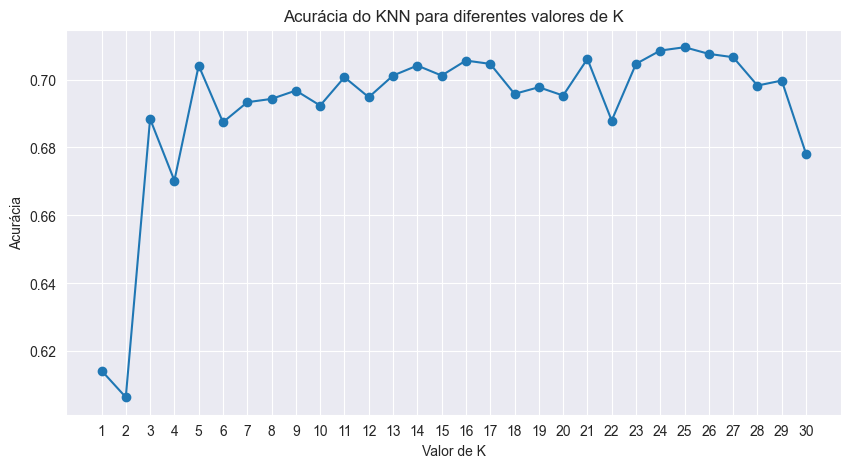

Melhor valor de K: 25 com acurácia de 0.7095


In [99]:

from sklearn.metrics import accuracy_score

accuracies = []
k_values = range(1, 31)  # Testar K de 1 até 30

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotar os resultados
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Acurácia do KNN para diferentes valores de K')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Melhor K
melhor_k = k_values[accuracies.index(max(accuracies))]
print(f"Melhor valor de K: {melhor_k} com acurácia de {max(accuracies):.4f}")

O dado com melhor acurácia foi 25, mas não significa que ele seja o melhor K a se utilizar, pois vendo no gráfico, poucos 'k's depois, começa uma queda.
O ideal é pegarmos por exemplo o K=11, que se mantém em um intervalo numa média quase linear. Isso pode significar que algum padrão foi identificado naquela quantidade de vizinhos.